## Metrics accuracy, precision, recall, f1

In [1]:
from sklearn import metrics
import random
import sys
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer#, HashingVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold #,train_test_split, GridSearchCV,
import matplotlib.pyplot as plt
import itertools


C:\Users\Tobias\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Functions

In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
def get_Scores(y_test,y_star):
    scores = []
    scores.append(metrics.precision_score(y_test, y_star, labels = ['true'], average = None)[0])
    scores.append(metrics.recall_score(   y_test, y_star, labels = ['true'], average = None)[0])
    scores.append(metrics.f1_score(       y_test, y_star, labels = ['true'], average = None)[0])
    scores.append(metrics.accuracy_score( y_test, y_star))    
    print('Scores:')
    print('precision: {}, recall: {}, \n f_measure: {}, accuracy: {}'.format(scores[0],scores[1],scores[2],scores[3]))
    
    return scores

In [4]:
## script_dataset3.py
# I included that we use also test.tsv of the liar_dataset
ds1 = './fake_or_real_news.csv'#sys.argv[1]
ds2_1 = './liar_dataset/test.tsv'
ds2_2 = './liar_dataset/train.tsv'
#ds2 = pd.concat([ds2_1,ds2_2], ignore_index=True)
def get_dataset3_split(dataset1_in, dataset2_1_in, dataset2_2_in):
    try:
        print('processing datasets')
        print('ds1=', dataset1_in)
        print('ds2=', dataset2_1_in)
        print('ds3=', dataset2_2_in)

        print('-- fake news')
        df1 = pd.read_csv(dataset1_in, sep=',', usecols=['title','text','label'])
        df1['claim'] = df1[['title', 'text']].apply(lambda x: '. '.join(x), axis=1)
        del df1['title']
        del df1['text']
        df1.rename(index=str, columns={'label': 'y'}, inplace=True)
        print("df1.keys(): ", df1.keys())
        print("len(df1[df1['y']=='REAL']): ", len(df1[df1['y']=='REAL']))
        print("len(df1[df1['y']=='FAKE']): ", len(df1[df1['y']=='FAKE']))
        df1['y'] = np.where(df1['y'] == 'FAKE', 'false', 'true') #set y to false if FAKE, else true
        print("len(df1) ",len(df1))

        print('-- liar liar')
        #Concatenate train and test
        df2_1 = pd.read_csv(dataset2_1_in, sep='\t', header=None, usecols=[1,2], names=['y', 'claim'])
        df2_2 = pd.read_csv(dataset2_2_in, sep='\t', header=None, usecols=[1,2], names=['y', 'claim'])
        df2 = pd.concat([df2_1,df2_2], ignore_index=True)
        print("df2.keys(): ", df2.keys())
        print('set(df2.y): {}, len(df2): {}'.format(set(df2.y), len(df2)))
        print(len(df2[df2['y'] == 'true']))
        print(len(df2[df2['y'] == 'false']))
        df2=df2[(df2['y'] == 'true') | (df2['y'] == 'false')]   #only take values true and false
        print(set(df2.y), len(df2))

        df3=pd.concat([df1, df2], ignore_index=True)

        print(df3['y'].value_counts())
        print('done')
        return df3['claim'], df3['y']
        #return train_test_split(df3['claim'], df3['y'], test_size=0.30, random_state=4222)
    except Exception as e:
        print(e)


# Datasets

## Dataset 1

In [5]:
df_fakeorreal = pd.read_csv('./fake_or_real_news.csv',sep=',', usecols=['title','text','label'])
#df_pantsfire_test  = pd.read_csv('./liar_dataset/test.tsv',  sep='\t', header=None,usecols=[1,2], names=['y', 'claim'])
df_fakeorreal['claim'] = df_fakeorreal[['title', 'text']].apply(lambda x: '. '.join(x), axis=1)
del df_fakeorreal['text']
del df_fakeorreal['title']
df_fakeorreal.rename(index = str, columns = {'label': 'y'}, inplace=True)
df_fakeorreal.head()
#print (df_fakeorreal.keys())
  #  df1['claim'] = df1[['title', 'text']].apply(lambda x: '. '.join(x), axis=1)
  #  del df1['title']
  #  del df1['text']
  #  df1.rename(index=str, columns={'label': 'y'}, inplace=True)

,y,claim
0,FAKE,You Can Smell Hillary’s Fear. Daniel Greenfiel...
1,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...
2,REAL,Kerry to go to Paris in gesture of sympathy. U...
3,FAKE,Bernie supporters on Twitter erupt in anger ag...
4,REAL,The Battle of New York: Why This Primary Matte...


In [6]:
df_fakeorreal['y'] = np.where(df_fakeorreal['y'] == 'FAKE', 'false', 'true')
df_fakeorreal.head()

,y,claim
0,false,You Can Smell Hillary’s Fear. Daniel Greenfiel...
1,false,Watch The Exact Moment Paul Ryan Committed Pol...
2,true,Kerry to go to Paris in gesture of sympathy. U...
3,false,Bernie supporters on Twitter erupt in anger ag...
4,true,The Battle of New York: Why This Primary Matte...


## Dataset 2

In [7]:
#Liar liar, pants on fire: train and test
df_pantsfire_train = pd.read_csv('./liar_dataset/test.tsv' , sep='\t', header=None, usecols=[1,2], names=['y', 'claim'])
df_pantsfire_test  = pd.read_csv('./liar_dataset/train.tsv', sep='\t', header=None, usecols=[1,2], names=['y', 'claim'])
#only take values true and false
df_pantsfire_train=df_pantsfire_train[(df_pantsfire_train['y'] == 'true') | (df_pantsfire_train['y'] == 'false')] 
df_pantsfire_test=df_pantsfire_test[(df_pantsfire_test['y'] == 'true') | (df_pantsfire_test['y'] == 'false')]   
                
#Concatenate Datasets (test and train)
df_pantsfire = pd.concat([df_pantsfire_test,df_pantsfire_train], ignore_index=True)
#df_pantsfire      = pd.read_csv('./liar_dataset/train.tsv', sep='\t', header=None,usecols=[1,2], names=['y', 'claim'])
print(df_pantsfire_test.shape)
print(df_pantsfire_train.shape)
print(df_pantsfire.shape)
df_pantsfire.head()

(3671, 2)
(457, 2)
(4128, 2)


,y,claim
0,false,Says the Annies List political group supports ...
1,false,Health care reform legislation is likely to ma...
2,true,The Chicago Bears have had more starting quart...
3,false,When Mitt Romney was governor of Massachusetts...
4,true,McCain opposed a requirement that the governme...


## Dataset 3

In [8]:
X_ds3, y_ds3 = get_dataset3_split(ds1,ds2_1,ds2_2)#ds1,ds2)
print('Length X_ds3: ',len(X_ds3))
print('Length y_ds3: ',len(y_ds3))
print(y_ds3.get_values()[0], X_ds3.get_values()[0])

processing datasets
ds1= ./fake_or_real_news.csv
ds2= ./liar_dataset/test.tsv
ds3= ./liar_dataset/train.tsv
-- fake news
df1.keys():  Index(['y', 'claim'], dtype='object')
len(df1[df1['y']=='REAL']):  3171
len(df1[df1['y']=='FAKE']):  3164
len(df1)  6335
-- liar liar
df2.keys():  Index(['y', 'claim'], dtype='object')
set(df2.y): {'false', 'mostly-true', 'half-true', 'pants-fire', 'barely-true', 'true'}, len(df2): 11507
1884
2244
{'true', 'false'} 4128
false    5408
true     5055
Name: y, dtype: int64
done
Length X_ds3:  10463
Length y_ds3:  10463
false You Can Smell Hillary’s Fear. Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. 
In the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI. 
The word “unprecedented” has been thrown around so often this election that it ought to be retired. But it’s still unprecedented for the nominee of a major political party to go war with the FBI. 
Bu

# Configuration 1
## Model_a 
### -> TfidfVectorizer(=count_vect+tfidfTransformer,..

In [9]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

In [10]:
X_df_fakeorreal = tfidf_vectorizer.fit_transform(df_fakeorreal['claim'])
y_df_fakeorreal = df_fakeorreal['y']
clf_MNB = MultinomialNB(alpha = 0.4)
#clfMNB = clf_MNB.fit(X_df_fakeorreal, y_df_fakeorreal)

skf = StratifiedKFold(n_splits = 5, shuffle= False, random_state = 4222)
scores_avg = [0,0,0,0]
for train, test in skf.split(X_df_fakeorreal,y_df_fakeorreal):
    X_train, X_test = X_df_fakeorreal[train],X_df_fakeorreal[test]
    y_train, y_test  = y_df_fakeorreal[train],y_df_fakeorreal[test]
        
    clf_MNB.fit(X_train, y_train)
    y_star = clf_MNB.predict(X_test)
    scores = get_Scores(y_test, y_star)
    scores_avg = [scores_avg[i]+ scores[i] for i in range(4)]
scores_avg = [i/5 for i in scores_avg]

print('----------')
print('Averaged values:')
print('precision: {}, recall: {}, \n f_measure: {}, accuracy: {}'.format(scores_avg[0],scores_avg[1],scores_avg[2],scores_avg[3]))
    

Scores:
precision: 0.830393487109905, recall: 0.9637795275590552, 
 f_measure: 0.8921282798833821, accuracy: 0.8832807570977917
Scores:
precision: 0.8281461434370772, recall: 0.9652996845425867, 
 f_measure: 0.8914785142024764, accuracy: 0.8823993685872139
Scores:
precision: 0.8136729222520107, recall: 0.9574132492113565, 
 f_measure: 0.8797101449275362, accuracy: 0.8689818468823993
Scores:
precision: 0.8317631224764468, recall: 0.9747634069400631, 
 f_measure: 0.8976034858387799, accuracy: 0.8887134964483031
Scores:
precision: 0.820855614973262, recall: 0.9684542586750788, 
 f_measure: 0.8885672937771346, accuracy: 0.8783570300157978
----------
Averaged values:
precision: 0.8249662580497403, recall: 0.9659420253856281, 
 f_measure: 0.8898975437258618, accuracy: 0.8803464998063012


In [11]:
#For Configuration we fit the Multinomial Naive Bayes Classifier to the whole dataset
clf_MNB.fit(X_df_fakeorreal, y_df_fakeorreal)


MultinomialNB(alpha=0.4, class_prior=None, fit_prior=True)

# Configuration 2
## Model_b

In [12]:
df_pantsfire.head()

,y,claim
0,false,Says the Annies List political group supports ...
1,false,Health care reform legislation is likely to ma...
2,true,The Chicago Bears have had more starting quart...
3,false,When Mitt Romney was governor of Massachusetts...
4,true,McCain opposed a requirement that the governme...


In [13]:
X_train_pantsfire = tfidf_vectorizer.transform(df_pantsfire_train['claim'])
X_test_pantsfire  = tfidf_vectorizer.transform(df_pantsfire_test['claim'])
y_train_pantsfire = df_pantsfire_train['y']
y_test_pantsfire  = df_pantsfire_test['y']

3-Neighbor Classifier
tested on Training set:
Scores:
precision: 0.7209302325581395, recall: 0.7451923076923077, 
 f_measure: 0.7328605200945627, accuracy: 0.7527352297592997
Confusion matrix, without normalization


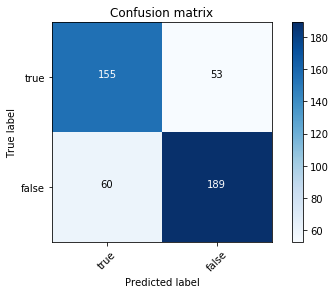

In [14]:
#on Training set
print('3-Neighbor Classifier')
print('tested on Training set:')
clf_KNeighbor = KNeighborsClassifier(3)
clf_KNeighbor.fit(X_train_pantsfire, y_train_pantsfire)


y_star_pantsfire = clf_KNeighbor.predict(X_train_pantsfire)
scores = get_Scores(y_train_pantsfire, y_star_pantsfire)

confusion_matrix = metrics.confusion_matrix(y_train_pantsfire, y_star_pantsfire, labels=['true', 'false'])
plot_confusion_matrix(confusion_matrix, classes=['true', 'false'])

3-Neighbor Classifier
tested on Test set:
Scores:
precision: 0.4725592143269786, recall: 0.4880668257756563, 
 f_measure: 0.48018784854710883, accuracy: 0.5175701443748297
Confusion matrix, without normalization


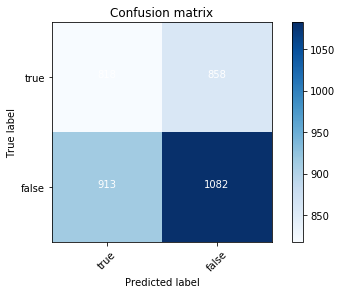

In [15]:
#on Test set:
print('3-Neighbor Classifier')
print('tested on Test set:')
clf_KNeighbor = KNeighborsClassifier(3)
clf_KNeighbor.fit(X_train_pantsfire, y_train_pantsfire)


y_star_pantsfire = clf_KNeighbor.predict(X_test_pantsfire)
scores = get_Scores(y_test_pantsfire, y_star_pantsfire)

confusion_matrix = metrics.confusion_matrix(y_test_pantsfire, y_star_pantsfire, labels=['true', 'false'])
plot_confusion_matrix(confusion_matrix, classes=['true', 'false'])

# Configuration 3
## model a => dataset2

Scores:
precision: 0.4609012591119947, recall: 0.8299522673031027, 
 f_measure: 0.5926714955262037, accuracy: 0.4791609915554345
Confusion matrix, without normalization


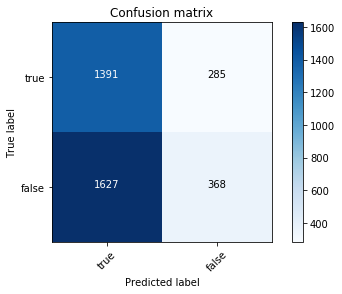

In [16]:
y_star_pantsfire = clf_MNB.predict(X_test_pantsfire)
scores = get_Scores(y_test_pantsfire, y_star_pantsfire)

confusion_matrix = metrics.confusion_matrix(y_test_pantsfire, y_star_pantsfire, labels=['true', 'false'])
plot_confusion_matrix(confusion_matrix, classes=['true', 'false'])

# model2 => dataset1 (test) 

Scores:
precision: 0.501628664495114, recall: 0.4856512141280353, 
 f_measure: 0.49351065534369487, accuracy: 0.501026045777427
Confusion matrix, without normalization


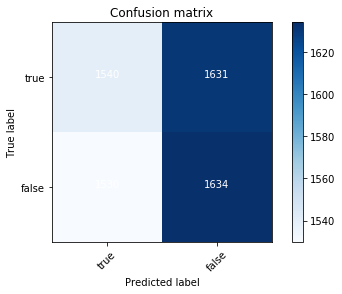

In [17]:
y_star = clf_KNeighbor.predict(X_df_fakeorreal)
scores = get_Scores(y_df_fakeorreal, y_star)
confusion_matrix = metrics.confusion_matrix(y_df_fakeorreal, y_star, labels=['true', 'false'])
plot_confusion_matrix(confusion_matrix, classes=['true', 'false'])

# Configuration 4
## model c => dataset3 (train / test split)


In [22]:
print('Length X_ds3: ',len(X_ds3))
#print(y_ds3.get_values()[1], X_ds3.get_values()[3])
X_ds3 = tfidf_vectorizer.transform(X_ds3.get_values())


TypeError: sparse matrix length is ambiguous; use getnnz() or shape[0]

In [19]:
clf_SGD = SGDClassifier(max_iter=100)  

skf = StratifiedKFold(n_splits = 5, shuffle= False, random_state = 4222)
scores_avg = [0,0,0,0]
for train, test in skf.split(X_ds3,y_ds3):
    X_train, X_test = X_ds3[train],X_ds3[test]
    y_train, y_test  = y_ds3[train],y_ds3[test]
        
    clf_SGD.fit(X_train, y_train)
    y_star = clf_SGD.predict(X_test)
    scores = get_Scores(y_test, y_star)
    scores_avg = [scores_avg[i]+ scores[i] for i in range(4)]
scores_avg = [i/5 for i in scores_avg]

print('----------')
print('Averaged values:')
print('precision: {}, recall: {}, \n f_measure: {}, accuracy: {}'.format(scores_avg[0],scores_avg[1],scores_avg[2],scores_avg[3]))


Scores:
precision: 0.9120879120879121, recall: 0.9030662710187932, 
 f_measure: 0.9075546719681908, accuracy: 0.9111323459149546
Scores:
precision: 0.9076773566569485, recall: 0.923837784371909, 
 f_measure: 0.9156862745098039, accuracy: 0.917821309125657
Scores:
precision: 0.8955078125, recall: 0.9070227497527201, 
 f_measure: 0.9012285012285013, accuracy: 0.9039655996177736
Scores:
precision: 0.5965559655596556, recall: 0.4797230464886251, 
 f_measure: 0.5317982456140351, accuracy: 0.5917782026768642
Scores:
precision: 0.5692307692307692, recall: 0.3659742828882295, 
 f_measure: 0.4455147501505117, accuracy: 0.5597514340344169
----------
Averaged values:
precision: 0.776211963207057, recall: 0.7159248269040555, 
 f_measure: 0.7403564886942086, accuracy: 0.7768897782739332
